In [1]:
#%pip install mlxtend --user
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

### Create data set

In [13]:
def create_dataset(random_state=999):
    X, y = make_classification(                                         #TODO: do these values have mean=0 and std=1
        n_samples=100, n_features=2, n_redundant=0, n_informative=2,
        n_clusters_per_class=1, class_sep=1.0, random_state=random_state
    )
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
    # print(np.mean(X[:,0]), np.std(X[:,0]))
    # print(np.mean(X[:,1]), np.std(X[:,1]))
    return X,y 

### Learning algorithm

In [15]:
H = lambda x: np.heaviside(x,1).astype(int)

class RosenblattPerceptron(object):

    def __init__(self, epochs=10) -> None:
        self.epochs = epochs

    def predict(self, X):
        return H(np.dot(X, self.weights[1:]) + self.weights[0])
    
    def train(self, X, y):
        
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, y_true in zip(X, y):
                # update rule
                error = y_true - self.predict(xi)
                # update the weights
                if error != 0.0:
                    self.weights[1:] += error * xi
                    # Bias
                    self.weights[0] += error
                    errors += 1
            self.errors.append(errors)
            if self.errors == 0:
                break

        return self
        

### Rosenblatt perceptron

Weights: [ 3.         -3.54158679  4.35239964]


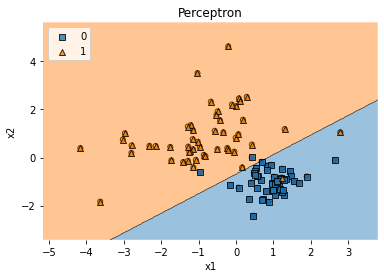

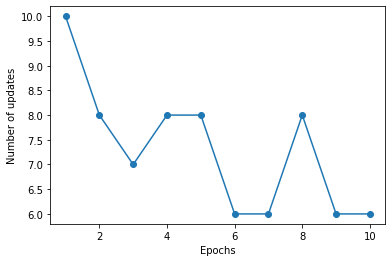

In [16]:
X, y = create_dataset(random_state=999)
rb = RosenblattPerceptron(epochs=10)

rb.train(X, y)
print('Weights: %s' % rb.weights)
plot_decision_regions(X, y, clf=rb)
plt.title('Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(rb.errors) + 1), rb.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Run multiple experiments

Weights: [-2.          0.59555623  2.96512492]


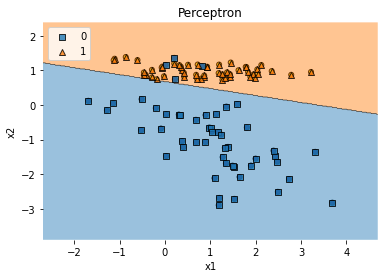

Weights: [ 0.         -2.05823323  0.22511104]


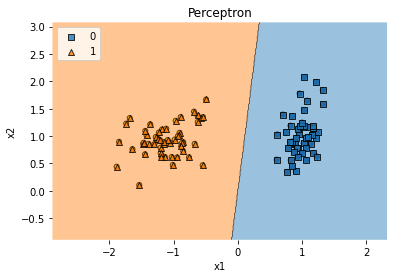

Weights: [2.         9.13807146 3.73310932]


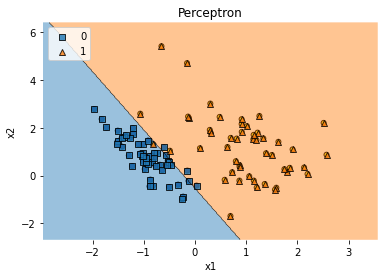

Weights: [ 0.         -0.90322101 -5.33634471]


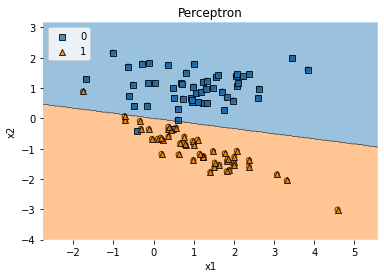

Weights: [-1.          0.15660201  2.19656341]


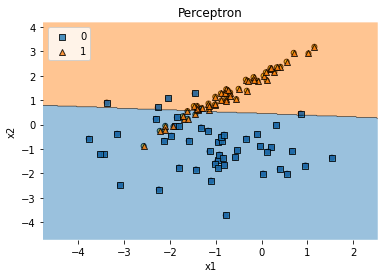

In [19]:
n_experiments = 5

for i in range(n_experiments):
    X, y = create_dataset(random_state=i)
    rb = RosenblattPerceptron(epochs=10)

    rb.train(X, y)
    print('Weights: %s' % rb.weights)
    plot_decision_regions(X, y, clf=rb)
    plt.title('Perceptron')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.show()
    